# Análisis socioeducativo de los habitantes de la Ciudad de Buenos Aires

# Conformación del equipo

* Lucía Hukovsky
* Juan Martín Carini
* Lucía Buzzeo
* José Saint Germain

# Presentación del problema y fuente de información

> ## Presentación del problema



Nos es de gran de interés vivir en una comunidad con políticas públicas eficaces que mejoren las condiciones de vida de las personas. En este sentido, hemos decidido analizar los diferentes ejes que en nuestro país se rigen por políticas publicas. Al respecto, encontramos una gran limitación en el eje de educación al reconocer que su acceso dista de ser equitativo. Este aspecto no nos resultó una novedad, sin embargo, nos dio el pie para comenzar una investigación que permita dar una explicación teórica a la problemática. 
En concreto, nos ha permitido conocer mejor la situación educativa actual de CABA y descubrir las principales variables que afectan el nivel educativo.

El análisis realizado en el marco del presente proyecto podría establecer una base de requerimientos que permitan generar políticas públicas efectivas, no solo en el ámbito educativo, sino en el económico, cultural, social y geográfico, entre otros.

> ## Definición de la fuente de información

Para trabajar esta problemática, hemos decidido recurrir a la [Encuesta Anual de Hogares](https://www.estadisticaciudad.gob.ar/eyc/?page_id=702) del Gobierno de la Ciudad de Buenos Aires para el año 2019. El mismo está disponible en la base de [datos abiertos](https://data.buenosaires.gob.ar/dataset/encuesta-anual-hogares/resource/3a45c563-396d-42de-ba93-8a93729e0723) del GCBA.

Esta encuesta contiene información demográfica, social, económica, educativa y de salud de 14319 habitantes de la Ciudad, la cual es una muestra representativa que permite obtener un vistazo de la población de la Ciudad.

# Preguntas y objetivos de la investigación

Nuestro objetivo principal ha sido descubrir las principales variables intervinientes en el nivel máximo educativo alcanzado por la población de la Ciudad Autónoma de Buenos Aires (CABA).

De este objetivo principal se desprenden los siguientes objetivos especificos:
* Determinar si la ubicación geográfica del encuestado es determinante para alcanzar ciertos niveles educativos. De este objetivo se desprende determinar la relación entre el nivel educativo y la comuna del encuestado, así como la relación entre la misma variable y el hecho de que el encuestado habite en una villa de emergencia.
* Establecer la fuerza con la que el nivel socioeconómico afecta la variable target.
* Explorar la relación del target con otras variables, como el sexo del encuestado, la cantidad de hijos, la afiliación de salud o la edad.

# Orden de trabajo

Este trabajo se ha dividido en 3 partes:

1.   Introducción a las variables del problema: 
  Se ha realizado un analisis de las variables en donde se ha buscado conocer su performance dentro del datset y su potencial significancia para la pregunta que buscamos responder. A la vez, hemos investigado cómo las variables interactúan entre si. Esta parte es lo que se conoce como análisis univariado, bivariado y multivariado
2.   Modelos análiticos: 
  En esta sección se han llevado a cabo diversos modelos análiticos y algoritmos que han servido para acercarnos a la respuesta la pregunta que dio inicio a la presente investigación 
3. Conclusión:
  Se han alcanzado conclusiones finales sobre los hallazgos. Además, se han discutido posibles limitaciones y se han planteado futuras líneas de análisis a partir del análisis presente. 



# EDA


In [32]:
#Cargamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Cargamos el dataset con el que vamos a trabajar y le damos un vistazo
df = pd.read_csv("https://github.com/LHukovsky/Coderhouse-Final-Project-/raw/main/encuesta-anual-hogares-2019.csv",
                 encoding="latin1")
df.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


In [34]:
#Miramos sus variable, el tipo que son y si tienen nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14319 non-null  int64 
 1   nhogar                       14319 non-null  int64 
 2   miembro                      14319 non-null  int64 
 3   comuna                       14319 non-null  int64 
 4   dominio                      14319 non-null  object
 5   edad                         14319 non-null  int64 
 6   sexo                         14319 non-null  object
 7   parentesco_jefe              14319 non-null  object
 8   situacion_conyugal           14318 non-null  object
 9   num_miembro_padre            14319 non-null  object
 10  num_miembro_madre            14319 non-null  object
 11  estado_ocupacional           14319 non-null  object
 12  cat_ocupacional              14319 non-null  object
 13  calidad_ingresos_lab         14

Generamos diversas transformaciones de variables, así como la creación de la variale "Target", pues es la que usaremos para todo el análisis.

In [35]:
#Creamos el target para nivel_max_educativo
def target(row):  
    if (row['nivel_max_educativo'] == 'Secundario/medio comun') | (row['nivel_max_educativo'] == 'EGB (1° a 9° año)'):
        return 'sec_completo'
    elif (row['nivel_max_educativo'] == 'Primario especial') | (row['nivel_max_educativo'] == 'Primario comun'):
        return 'prim_completo'
    elif row['nivel_max_educativo'] == 'Sala de 5':
        return 'inicial'
    elif row['nivel_max_educativo'] == 'Otras escuelas especiales':
        return 'superior'
    elif (row["nivel_max_educativo"] == "nan"):
      return "nan"

df['Target'] = df.apply(lambda row: target(row), axis=1)

#Remplazo los valores de años_escolaridad para que todos sean numéricos
df.loc[df.años_escolaridad=="Ningun año de escolaridad aprobado","años_escolaridad"]=0
df["años_escolaridad"] = df["años_escolaridad"].astype('float')

#La variable "cantidad_hijos_nac_vivos" se puede pasar a numérica si se toma "no corresponde" como NAN.
df.loc[df.cantidad_hijos_nac_vivos=="No corresponde","cantidad_hijos_nac_vivos"]="0"
df["cantidad_hijos_nac_vivos"] = df["cantidad_hijos_nac_vivos"].apply(int)

#Hay determinadas variables (comuna,id,nhogar y miembro) que están como numéricas pero deberían ser categóricas.
df[["comuna","id","nhogar","miembro"]] = df[["comuna","id","nhogar","miembro"]].applymap(str)


#Por otro lado, variables como sexo y dominio pueden pasarse a numérico mediante one hot encoding.

#one hot encoding
df = pd.get_dummies(df, columns=['sexo','dominio'],drop_first=True)

#genero la variable "target" como copia de "Target" para tener ambas versiones de la variable (categórica y one hot encoding)
df["target"] = df["Target"]


# Paso la variable Target a one hot encoding
df = pd.get_dummies(df, columns=['Target'],drop_first=False,dummy_na=False)

# Por último renombramos algunas variables para que sean más cortas
df.rename(columns = {'dominio_Villas de emergencia': 'dominio_villas', 
                     'ingreso_per_capita_familiar': 'ing_per_cap_familiar',
                     "cantidad_hijos_nac_vivos" : "cant_hijos_nac_vivos"}, inplace = True)

In [36]:
#Armamos un diccionario con las variables y etiquetas, esto nos va a servir para generar títulos en los gráficos
etiquetas = {
    'id'                          : 'Clave que identifica la vivienda',
    'nhogar'                      : 'La variable id + nhogar = clave que identifica a cada hogar',
    'miembro'                     : 'Variables id + nhogar + miembro = clave que identifica a cada persona',
    'comuna'                      : 'Comuna donde reside la persona encuestada',
    'edad'                        : 'Edad de la persona encuestada',
    'sexo'                        : 'Sexo de la persona encuestada',
    'parentesco_jefe'             : 'Parentesco entre la persona encuestada y el jefe de hogar',
    'situacion_conyugal'          : 'Situación conyugal de la persona encuestada',
    'num_miembro_padre'           : 'Número de miembro que corresponde al padre',
    'num_miembro_madre'           : 'Número de miembro que corresponde a la madre',
    'estado_ocupacional'          : 'Situación ocupacional de la persona encuestada',
    'cat_ocupacional'             : 'Categoría ocupacional de la persona encuestada',
    'calidad_ingresos_lab'        : 'Calidad de la declaración de ingresos laborales totales',
    'ingreso_total_lab'           : 'Ingreso total laboral percibido el mes anterior', 
    'calidad_ingresos_no_lab'     : 'Calidad de la declaración de ingresos no laborales totales', 
    'ingreso_total_no_lab'        : 'Ingreso total no laboral percibido el mes anterior',
    'calidad_ingresos_totales'    : 'Calidad de ingresos totales individuales', 
    'ingresos_totales'            : 'Ingreso total individual percibido el mes anterior',
    'calidad_ingresos_familiares' : 'Calidad de ingresos totales familiares',
    'ingresos_familiares'         : 'Ingresos totales familiares percibido el mes anterior',
    'ing_per_cap_familiar'        : 'Ingreso familiar per capita percibido el mes anterior', 
    'estado_educativo'            : 'Asistencia (pasada o presente) o no a algún establecimiento educativo', 
    'sector_educativo'            : 'Sector al que pertenece el establecimiento educativo al que asiste',
    'nivel_actual'                : 'Nivel cursado al momento de la encuesta',
    'nivel_max_educativo'         : 'Máximo nivel educativo que se cursó',
    'años_escolaridad'            : 'Años de escolaridad alcanzados',
    'lugar_nacimiento'            : 'Lugar de nacimiento de la persona encuestada',
    'afiliacion_salud'            : 'Afiliación de salud de la persona encuestada',
    'hijos_nacidos_vivos'         : 'Tiene o tuvo hijos nacidos vivos',
    'cant_hijos_nac_vivos'        : 'Cantidad de hijos nacidos vivos',
    'sexo_Varon'                  : '¿El encuestado es varón? no:0, si:1',
    'dominio_villas'              : '¿El encuestado vive en una villa de emergencia? no:0, si:1', 
    'target'                      : 'Nivel máximo educativo',
    'Target_inicial'              : 'Nivel inicial', 
    'Target_prim_completo'        : 'Nivel primaro completo', 
    'Target_sec_completo'         : 'Nivel secundario completo',
    'Target_superior'             :'Nivel superior'}

Comenzamos analizando el dataset en su conjunto

In [37]:
print(f'El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas. \n')

El dataset tiene 14319 filas y 36 columnas. 



In [38]:
#Miramos las nuevas modificaciones en las variable, el tipo que son y si tienen nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14319 non-null  object 
 1   nhogar                       14319 non-null  object 
 2   miembro                      14319 non-null  object 
 3   comuna                       14319 non-null  object 
 4   edad                         14319 non-null  int64  
 5   parentesco_jefe              14319 non-null  object 
 6   situacion_conyugal           14318 non-null  object 
 7   num_miembro_padre            14319 non-null  object 
 8   num_miembro_madre            14319 non-null  object 
 9   estado_ocupacional           14319 non-null  object 
 10  cat_ocupacional              14319 non-null  object 
 11  calidad_ingresos_lab         14319 non-null  object 
 12  ingreso_total_lab            14319 non-null  int64  
 13  calidad_ingresos

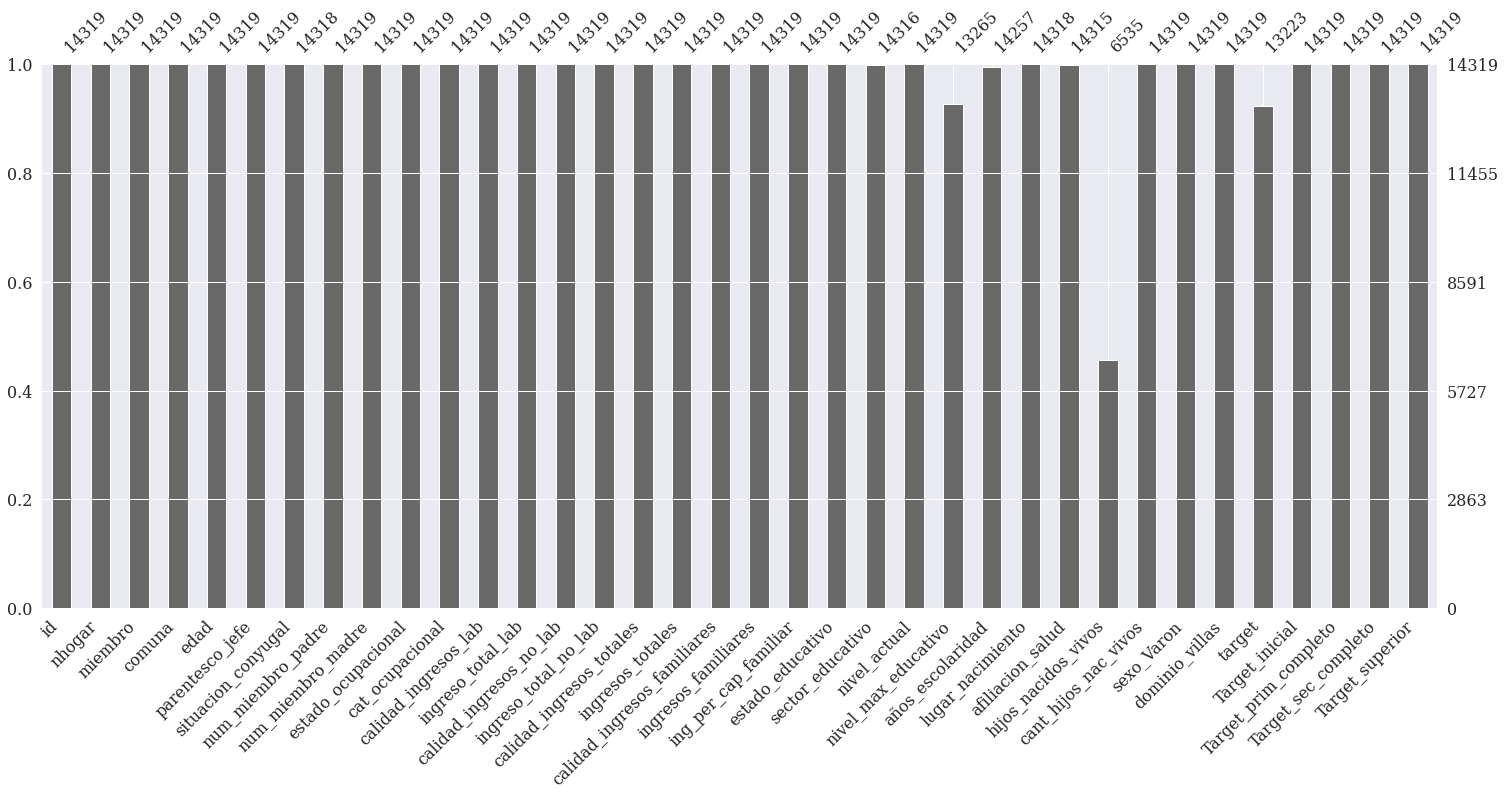

In [39]:
import missingno as msno
msno.bar(df);

In [40]:
#Tomamos el código visto en clase para tener un vistazo de las diversas medidas estadísticas de cada variale
from pandas.api.types import is_numeric_dtype
import numpy as np

def univariado_info(df):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  #Creamos un dataframe con columnas especificas:

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])
  #loop de todas las variables del dataframe
  for col in df:

      #obtengo info de la columna
      data_series = df[col]
      #lleno dataframe con las columnas iniciales
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  #calculo el describe 
  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  #calculo sesgo y curtosis
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([pd.Series(etiquetas,name='Etiqueta'),pd.concat([df_info,df_describe, df_stats], axis=1)], axis=1).fillna('-')


df_uni_stats = univariado_info(df).reset_index()
df_uni_stats.set_index(df_uni_stats['Etiqueta'],inplace=True)
df_uni_stats.drop(['Etiqueta'],axis=1,inplace=True)
df_uni_stats

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,index,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
Etiqueta,,,,,,,,,,,,,,,,
Clave que identifica la vivienda,id,14319,object,0,5795,False,4291,-,-,-,-,-,-,-,0.16901,-0.953158
La variable id + nhogar = clave que identifica a cada hogar,nhogar,14319,object,0,7,False,1,-,-,-,-,-,-,-,21.366705,687.880709
Variables id + nhogar + miembro = clave que identifica a cada persona,miembro,14319,object,0,19,False,1,-,-,-,-,-,-,-,1.940715,8.605228
Comuna donde reside la persona encuestada,comuna,14319,object,0,15,False,8,-,-,-,-,-,-,-,0.103211,-1.090936
Edad de la persona encuestada,edad,14319,int64,0,101,True,-,38.81549,23.11017,0.0,20.0,37.0,57.0,100.0,0.249452,-0.868539
Sexo de la persona encuestada,sexo,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Parentesco entre la persona encuestada y el jefe de hogar,parentesco_jefe,14319,object,0,9,False,Jefe,-,-,-,-,-,-,-,-,-
Situación conyugal de la persona encuestada,situacion_conyugal,14318,object,1,7,False,Soltero/a,-,-,-,-,-,-,-,-,-
Número de miembro que corresponde al padre,num_miembro_padre,14319,object,0,9,False,No corresponde,-,-,-,-,-,-,-,-,-


Detectamos que nuestra variable target tiene 1054 valores nulos. Es importante tener este dato presente cuando querramos correr un algoritmo de clasificación.

## Análisis univariado

### Género y edad

Comenzamos con un pantallazo general sobre las primeras cualidades de los datos, 
como muestra representativa para la EPH, sobre quiénes son los ciudadanos representado en el dataset.

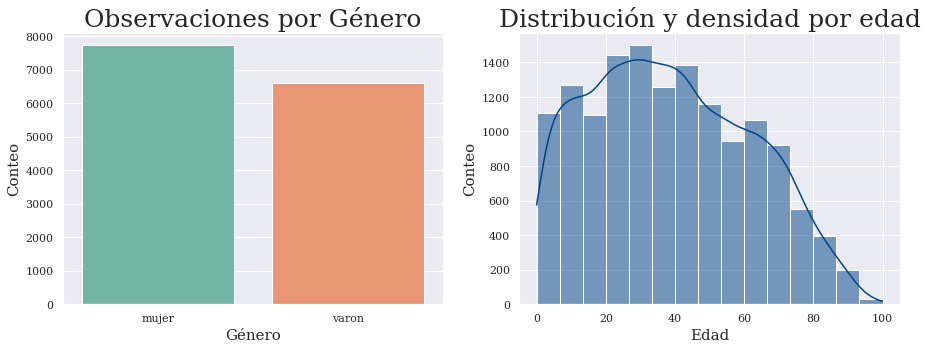

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sex = df['sexo_Varon']
edad = df['edad']

sns.countplot(x=sex, ax=axes[0], palette = 'Set2').set(title='Observaciones por Género', xlabel='Género', ylabel='Conteo')
axes[0].set_xticklabels(["mujer","varon"])

sns.histplot(x=edad,
            ax=axes[1],
            color='#004488',
            bins= 'sturges',
            kde=True).set(title='Distribución y densidad por edad', xlabel='Edad', ylabel='Conteo');

En la variable género los datos parecen equilibrados en las categorías. Para el caso de la variable "edad", la distribución se asemeja a la de una normal.

### Comuna

Seguimos observando la variable "comuna". En la misma se muestra la comuna de la Ciudad de Buenos Aires del entrevistado, de manera de tener una ubicación geográfica. Consideramos importante revisar esta variable ya que tenemos como hipótesis que el nivel educativo alcanzado puede estar dependiendo de la zona geográfica de la ciudad en la que se encuentra el entrevistado.

In [42]:
#instalamos geopandas para trabajar con mapas
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


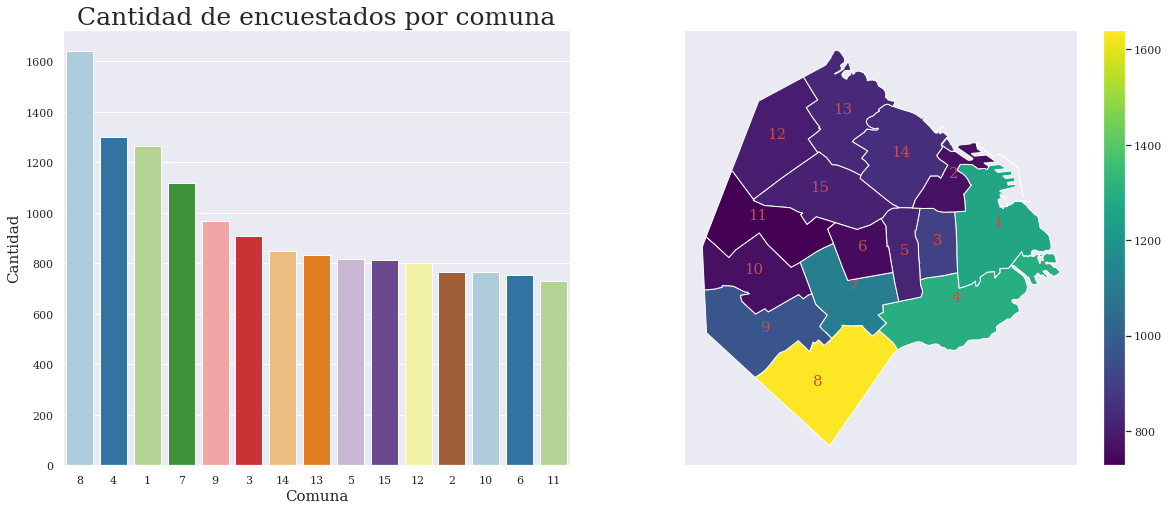

In [43]:
import geopandas as gpd
#Vamos a generar un mapa, así que vamos a importar el mapa de comunas de la Ciudad de Buenos Ainres
comunas = gpd.read_file("https://github.com/LHukovsky/Coderhouse-Final-Project-/raw/main/comunas.geojson")

#Transformamos las variables que vamos a usar para joinear el mapa con la base de manera que coincidan
comunas["COMUNAS"] = comunas["COMUNAS"].apply(int).apply(str)

# Transformamos la base para contablizar la frecuencia con la que aparece cada comuna en la base
com = pd.DataFrame(df["comuna"].value_counts()).reset_index()

# Unimos ambos datasets
df_com = gpd.GeoDataFrame(pd.merge(com,comunas[["COMUNAS","geometry"]],left_on="index",right_on="COMUNAS"))

#generamos el lienzo
fig , ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20,8))
plt.rcParams.update({"font.size":9,"axes.titlesize":25,"axes.labelsize":15, 'font.family':'serif'})

#mapa
df_com[["comuna","geometry"]].plot(ax= ax[1],column="comuna",legend=True,cmap="viridis",
           legend_kwds={'label': ""})
#agrego un gráfico de barras
sns.barplot(data=df_com, x="COMUNAS", y='comuna', color='COMUNAS', palette='Paired', ax=ax[0])

#genero una nueva variable con las coordenadas para poder agregar etiquetas en el centro geográfico de cada comuna
df_com['coords'] = df_com['geometry'].apply(lambda x: x.representative_point().coords[:])
df_com['coords'] = [coords[0] for coords in df_com['coords']]

for idx, row in df_com.iterrows():
    plt.annotate(s=row['COMUNAS'], xy=row['coords'],
                 horizontalalignment='center',size=15,color="r")
    
#for i, v in enumerate(df_com["comuna"].iteritems()):        
#    ax[0].text(i ,v[1], "{:,}".format(v[1]), color='r', va ='top')

#Título y etiquetas de variables    
ax[0].set_title("Cantidad de encuestados por comuna")
ax[0].set_ylabel("Cantidad")
ax[0].set_xlabel("Comuna")
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False);

Observando los dos gráficos generados vemos que las comunas 1,4,7 y 8 tienen mayor cantidad de casos. Queda por verse si en posteriores análisis es necesario abordar esta diferencia para evitar sesgos. Para eso, será necesario tomar en cuenta el porcentaje de la población total de cada comuna.

### Ingreso familiar per capita

Ahora probamos con observar los ingresos familiares. Creemos que puede ser un indicador interesante del nivel educativo.

In [44]:
#Armamos una función para graficar y jugar con el nivel del filtrado de la variable y obtener un histograma
#que permita apreciar mejor la distribución de la variable sin tantos outliers
def hist_box(DataFrame, #dataset
             x, #variable del gráfico
             limite,# frecuencia del rango para la etiqueta del eje x
             bins): 
  #sns.set(style="white", rc={"lines.linewidth": 2, "font.size":9,
  #                           "axes.titlesize":20,"axes.labelsize":17, 'font.family':'serif'})
  fig, ax = plt.subplots(figsize=(20,10),nrows=2,ncols=1,sharex=True)
  sns.histplot(x=x,
              data=df[df[x]<limite] ,
              color='#004488',
              ax=ax[1],
              bins= bins,
              kde=True)
  
  ax[0].boxplot(x=df[df[x]<limite][x],vert=False)
  ax[0].set_title(f"{etiquetas[x]} menor a {limite}",size=25)
  ax[1].set_title("")
  ax[0].set(xticks=range(0,limite+1,int(limite/20)))

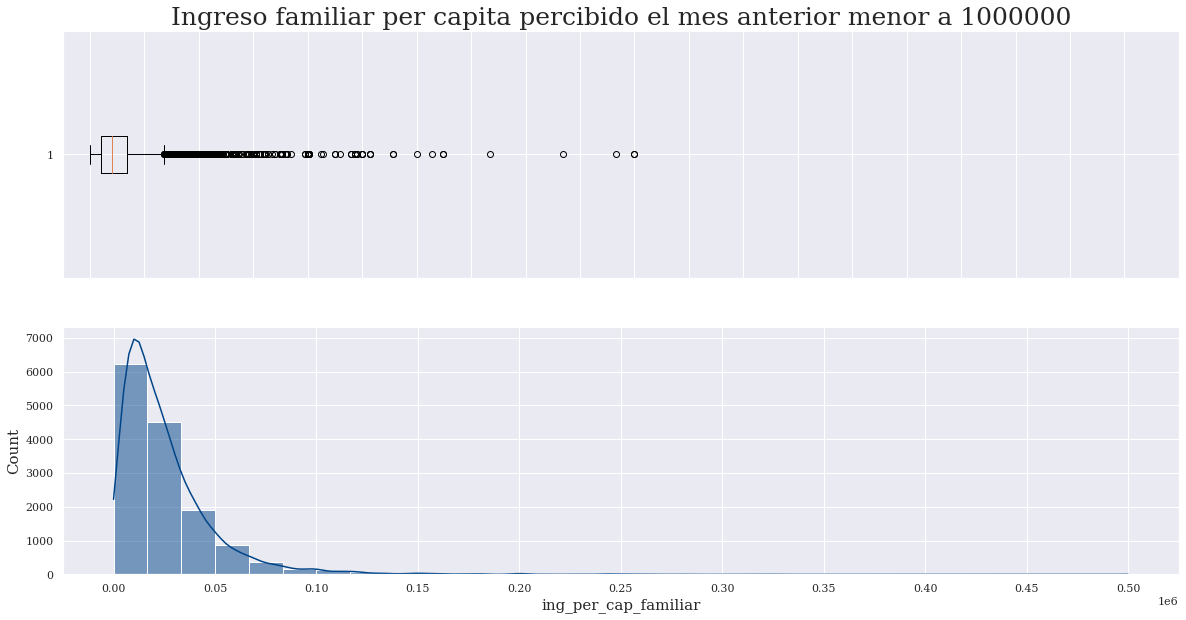

In [45]:
#probamos graficando con el máximo de la variable
hist_box(df,'ing_per_cap_familiar',max(df.ing_per_cap_familiar),bins=30);

Como hay muchos outliers que impiden ver la distribución correctamente, los quitamos de los gráficos.

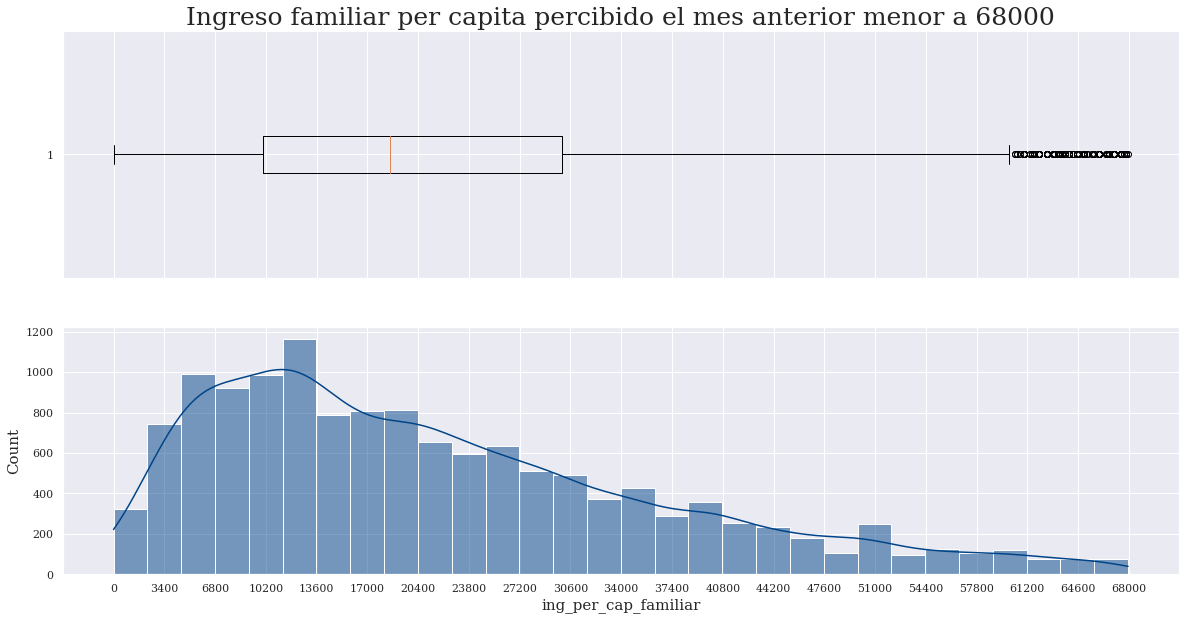

In [46]:
#Ahora probamos quitando los outliers
r75 = int(df.describe()["ing_per_cap_familiar"]["75%"]) #tercer cuartil
r25 = int(df.describe()["ing_per_cap_familiar"]["25%"]) #segundo cuartil

O = r75 + 1.5 * (r75-r25) #calculamos el límite inferior a los outliers
hist_box(df,"ing_per_cap_familiar",int(O),bins=30)

De este forma vemos que, aún removiendo los outliers, la distribución sigue sesgada.

### Años de escolaridad

In [47]:
#@title Texto de título predeterminado
df.describe()[["años_escolaridad"]].T

,count,mean,std,min,25%,50%,75%,max
años_escolaridad,14257.0,10.907905,5.353943,0.0,7.0,12.0,15.0,19.0


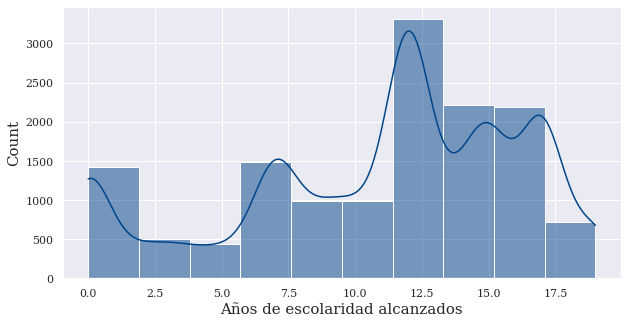

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(x="años_escolaridad",data=df,
             color='#004488',bins= 10,
             kde=True).set_xlabel(etiquetas["años_escolaridad"]);

A simple vista se observan tres "picos": en el valor mínimo, alrededor del 7.5 y alrededor del 12.5. Podemos inferir que estos tres casos corresponden a no tener estudios, solo haber transcurrido el primario y haber transcurrido hasta la educación secundaria, respectivamente.

### Máximo nivel educativo (Target)

In [49]:
def freq_table(df, col):

  #seleccion de data
  data = df[col]

  #verificacion de columna y si queremos cortes de intervalos
  if not is_numeric_dtype(data) or not with_cuts:
    #generaion de tabla de frecuenca ,con info absoluta
    freq_tab = pd.crosstab(data, columns='FreqAbs').sort_values('FreqAbs', ascending=False)
   
  #calculo del resto de la tabla de frecuencia
  freq_tab['FreqRel'] = freq_tab['FreqAbs'] / freq_tab['FreqAbs'].sum()
  freq_tab[['FAbsAcumulada', 'FAbsRelativa']] = freq_tab[['FreqAbs','FreqRel']].cumsum()
  return freq_tab

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


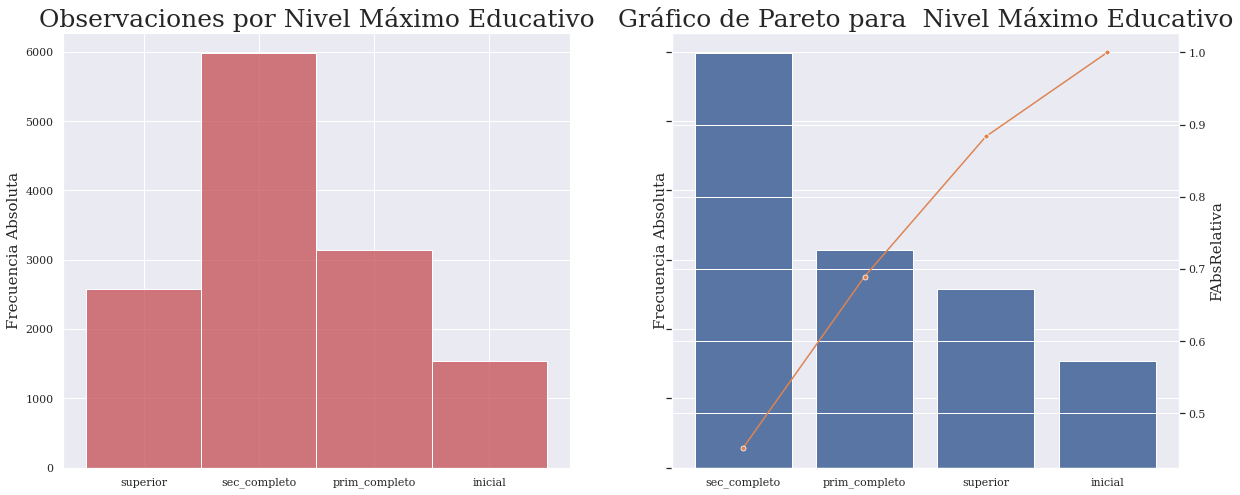

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8), sharey=True);


sns.histplot(x=df['target'], ax=axes[0], 
             color = 'C3').set(title='Observaciones por Nivel Máximo Educativo', 
                               xlabel='',
                               ylabel='Frecuencia Absoluta');

nivel  = freq_table(df, 'target').reset_index().sort_values('FreqAbs', ascending=False);

sns.barplot(data=nivel, x='target', y='FreqAbs', ax=axes[1], 
            color="C0").set(title='Gráfico de Pareto para  Nivel Máximo Educativo', 
                            xlabel='',
                            ylabel='Frecuencia Absoluta');
ax2 = axes[1].twinx();
sns.lineplot(nivel['target'], nivel["FAbsRelativa"], color="C1", marker="o", ms=5, ax=ax2);

**Podemos observar que el nivel maximo educativo más alcanzado es el secundario completo, seguido por el primario. Contrario de lo que habíamos intuido anteriormente, el nivel superior quedó en tercer lugar. 
Adicionalmente, el nivel secundario y primario explican casi el 77% de los datos.**

## Análisis bivariado

Realizamos diferentes heatmaps para ver si algo nos llama la atención.

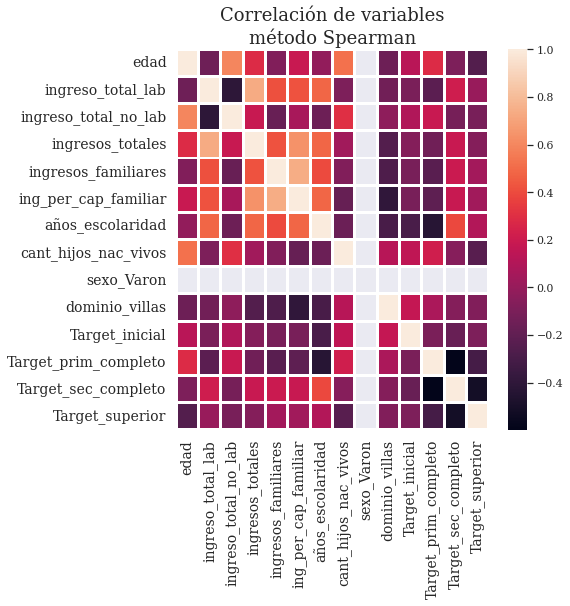

In [51]:
#generacion de los graficos de correlacion con el método Spearman
plt.figure(figsize=(7,7))
plt.rcParams.update({"font.size":9,"axes.titlesize":15,"axes.labelsize":15, 'font.family':'serif'})
correlation = df.dropna().corr(method="spearman")
high_corr=correlation[correlation>=0.0]
sns.heatmap(correlation, linewidth = 2)
plt.title("Correlación de variables\nmétodo Spearman", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14);

A simple vista, no se observan fuertes correlaciones. Sorprende la relación entre la variable sexo_Varon y el resto. Convendría consultar con el profesor para saber qué puede estar ocurriendo.

Podemos notar que en la variable que habíamos elegido como target para clasificar por nivel educativo no muestra correlaciones fuertes con las demás variable. Sin embargo, su versión numérica (años_escolaridad) si. 
La principal correlación positiva es años_escolaridad con ingreso familiar per cápita (ing_per_cap_familiar), lo cual hace sentido teórico. Adicionalmente, el ingreso familiar per capita tiene una correlación fuerte negativa con dominio_villa


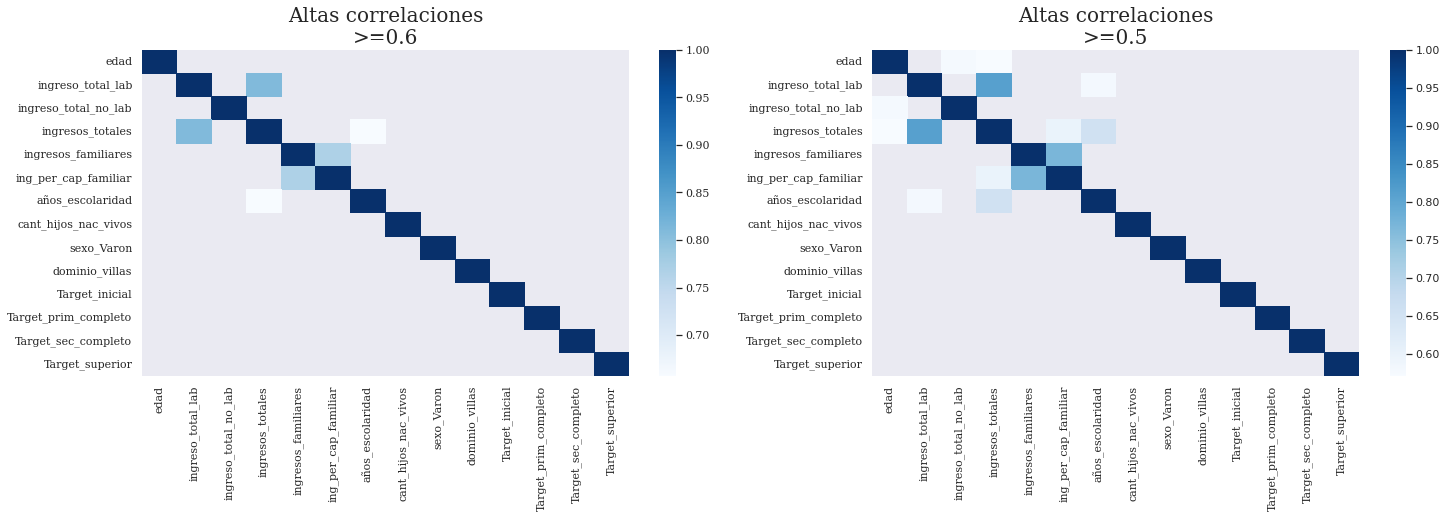

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [52]:
#metodo para solo graficar en base a un threshold
lista=[.6,.5] #treshold de los gráficos (si se quieren agregar más gráficos se puede hacer agregando tresholds a la lista)

fig , ax = plt.subplots(figsize=(24,6),ncols=len(lista),sharey=False)
mat_corr_spearman = df.corr('spearman')

for n,i in enumerate(lista):
  high_corr = mat_corr_spearman[mat_corr_spearman>=i]
  plt.figure(figsize=(12,8))
  sns.heatmap(high_corr, cmap="Blues",ax=ax[n])
  ax[n].set_title('Altas correlaciones\n>='+str(i),size=20);
  sns.set(font_scale=1);

Por último corremos una tabla de correlación y filtramos las de valores más altos

In [60]:
def corrFilter(x: pd.DataFrame, thres: float):
    #generate corr 
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

corrFilter(df, .5)

,Variable_1,Variable_2,corr_value
3,ingreso_total_lab,ingresos_totales,0.810840
7,ingresos_familiares,ing_per_cap_familiar,0.769356
6,ingresos_totales,años_escolaridad,0.656880
5,ingresos_totales,ing_per_cap_familiar,0.598997
4,ingreso_total_lab,años_escolaridad,0.579614
1,edad,ingreso_total_no_lab,0.578532
2,edad,ingresos_totales,0.570521
8,cant_hijos_nac_vivos,sexo_Varon,-0.569303


Conclusiones:

*   Como es esperable, hay alta correlación entre las variables relacionadas al ingreso
*   A su vez, encontramos una alta correlación (66%) entre los ingresos y los años de escolaridad
*   También observamos una relación positiva entre la edad y los ingresos totales
*   Por último, si bien no es tan alta como las demás correlaciones, parece que la cantidad de hijos nacidos vivos correlaciona negativamente con ser varón

### Comparación entre variables numéricas

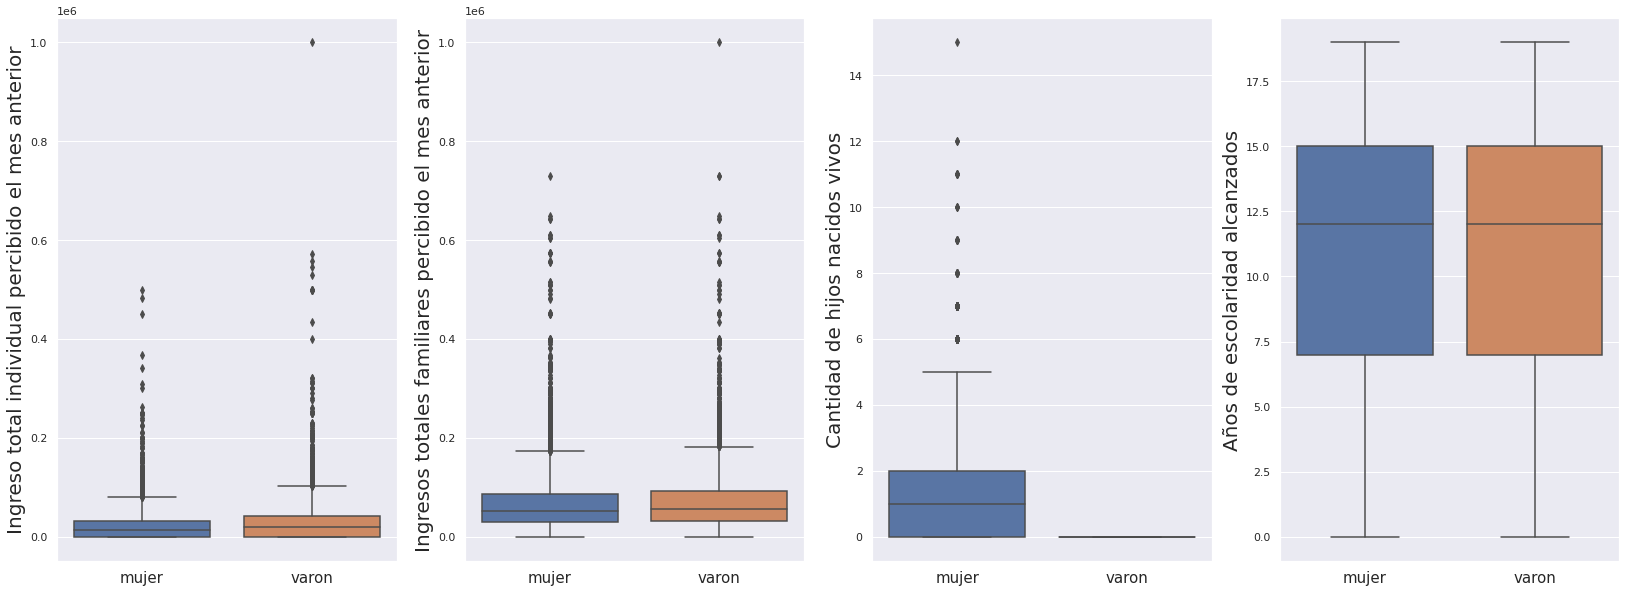

In [54]:
lista = ['ingresos_totales','ingresos_familiares','cant_hijos_nac_vivos','años_escolaridad']
fig, ax = plt.subplots(figsize=(28,10),ncols=len(lista))

for n,i in enumerate(lista):
  sns.boxplot(x = 'sexo_Varon', y= i, data=df,ax=ax[n],orient='v')
  ax[n].set_ylabel(etiquetas[i],size=20)
  ax[n].set_xlabel("")
  ax[n].set_xticklabels(["mujer","varon"],size=15);

Por parte de las variables de ingreso, no parece haber nada disruptivo. 
La distribución por ingreso y años de escolaridad pareciera ocurrir pero no en un orden lineal.

Sigue llamando la atención la variable sexo_Varon: por algún motivo, todos los encuestados hombres figuran sin hijos nacidos vivos. Alternativamente, se podría investigar la metodología de la encuesta para ver si hay alguna respuesta.
Adicionalmente, los hombres parecieran tener ingresos totales y familiares mayores que las mujeres (sexo_varon=0), pero no pareciera que haya distribuciones desiguales en los años de escolaridad.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


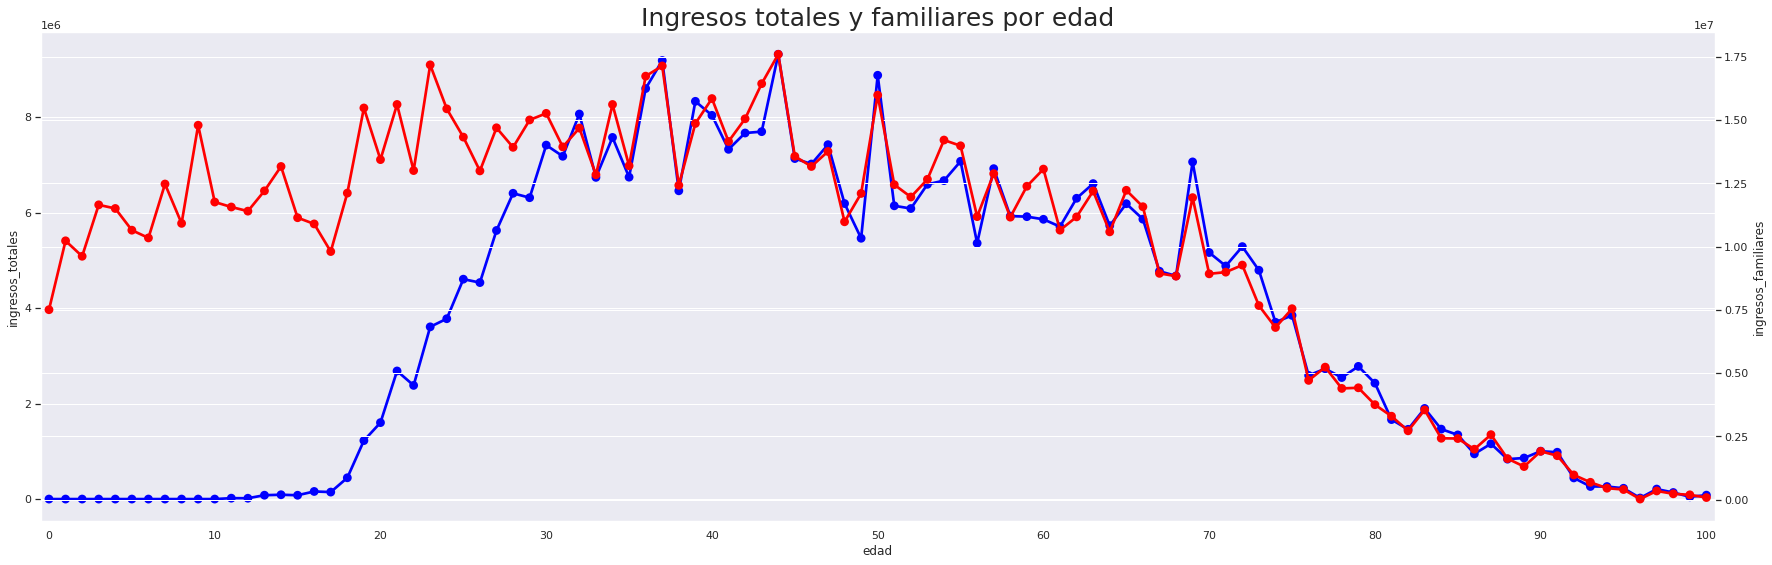

In [55]:
# grafico lineal en base a edad con dos variables de calculo

plt.figure(figsize=(30, 9))

grouped_day = df.groupby('edad')['ingresos_totales', 
                                 'ingresos_familiares'].sum().reset_index()

ax = sns.pointplot(x = 'edad', y = 'ingresos_totales', data=grouped_day, 
                   color = 'blue', label='ingresos_totales');
ax2 = ax.twinx();
ax = sns.pointplot(x = 'edad', y = 'ingresos_familiares', data=grouped_day,  
                   color = 'red', label='ingresos_familiares', ax=ax2)

ax.set_title("Ingresos totales y familiares por edad",size=25)
ax.set_xticks(range(0,101,10))
ax.set_xticklabels(range(0,101,10));

Se puede ver que desde los 30 años en adelante el ingreso total de la persona se corresponde con el ingreso familiar. Por ende suele haber un unico ingreso fuerte por grupo familiar.

### Comparación de variables categóricas con numéricas

Adicionalmente, vamos a comparar algunas variables con nuestro target, comenzando con los ingresos totales.

[Text(0, 0.5, 'Nivel máximo educativo'),
 Text(0.5, 0, 'Ingresos familiares'),
 Text(0.5, 1.0, 'Ingresos familiares por nivel máximo educativo')]

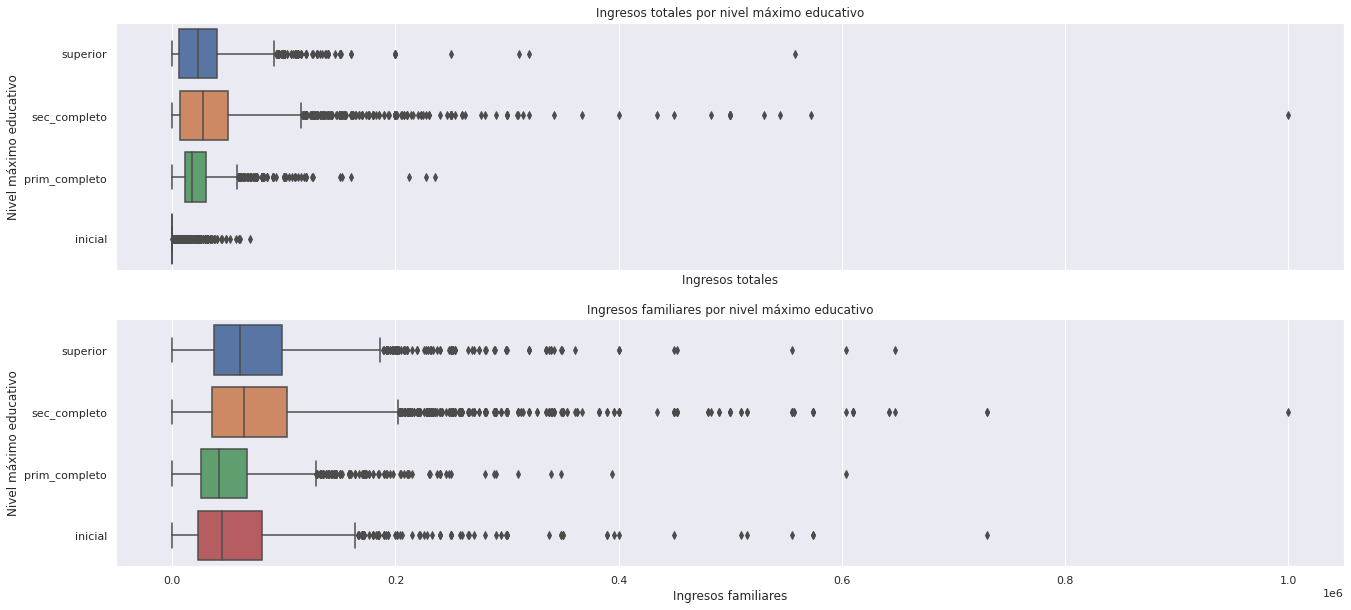

In [56]:
fig, ax = plt.subplots(figsize=(22,10),nrows=2, sharex=True)
sns.boxplot(y = 'target', 
            x='ingresos_totales', 
            data=df,ax=ax[0]).set(title="Ingresos totales por nivel máximo educativo", 
                                  ylabel="Nivel máximo educativo", xlabel="Ingresos totales")
sns.boxplot(y = 'target', 
            x='ingresos_familiares', 
            data=df,ax=ax[1]).set(title="Ingresos familiares por nivel máximo educativo", 
                                  ylabel="Nivel máximo educativo", xlabel="Ingresos familiares")

### Variable numéricas con comuna

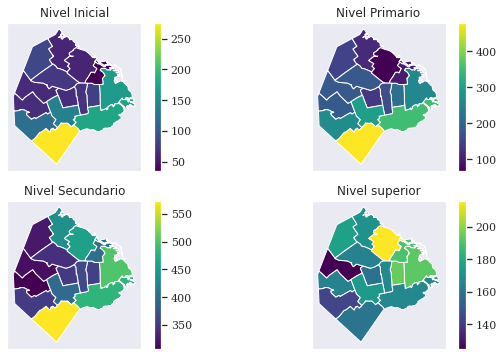

In [57]:
# Unimos ambos datasets
m = gpd.GeoDataFrame(pd.merge(df.groupby("comuna").sum(),
                                    comunas[["COMUNAS","geometry"]],left_on="comuna",right_on="COMUNAS"))

m.iloc[:,0:15] = m.iloc[:,0:15].applymap(int)

#generamos el lienzo
fig , ax = plt.subplots(figsize=(10,6),ncols=2,nrows=2,sharex=True,sharey=True)
plt.rcParams.update({"font.size":12,"axes.titlesize":25,"axes.labelsize":15, 'font.family':'serif'})

def mapa(variable,etiqueta,fila,columna):
  #mapa
  m.plot(column=variable,legend=True,cmap="viridis",
            legend_kwds={'label': ""},ax=ax[fila,columna])

  #Título y etiquetas de variables    
  ax[fila,columna].set_title(etiqueta,size=12)
  ax[fila,columna].get_xaxis().set_visible(False)
  ax[fila,columna].get_yaxis().set_visible(False);

mapa("Target_superior","Nivel superior",1,1)
mapa("Target_sec_completo","Nivel Secundario",1,0)
mapa("Target_prim_completo","Nivel Primario",0,1)
mapa("Target_inicial","Nivel Inicial",0,0)

Se observa que en el sur de la ciudad hay  mayor cantidad de encuestados con niveles de inicial, primario y secundario completo, mientras que el norte (particularmente el barrio de Palermo) tiene mayor cantidad de personas con estudios superiores. En menor medida también las comunas del este (comunmente llamado el "centro" de la ciudad) destacan por la cantidad de encuestados con nivel superior.

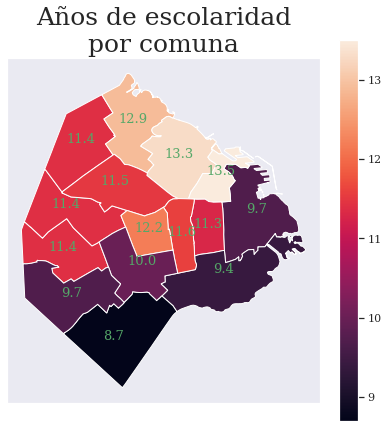

In [58]:
import numpy as np

#armamos el mismo dataset anterior pero tomando el promedio de cada variable por comuna
m = gpd.GeoDataFrame(pd.merge(df.groupby("comuna").aggregate(np.mean),
                                    comunas[["COMUNAS","geometry"]],left_on="comuna",right_on="COMUNAS"))

#redondeamos los valores
m["años_escolaridad"] = round(m["años_escolaridad"],1)

#armamos el gráfico
fig, ax = plt.subplots(figsize=(7,7))

m.plot(column="años_escolaridad",legend=True,cmap="rocket",
             legend_kwds={'label': ""},ax=ax)

#genero una nueva variable con las coordenadas para poder agregar etiquetas en el centro geográfico de cada comuna
m['coords'] = m['geometry'].apply(lambda x: x.representative_point().coords[:])
m['coords'] = [coords[0] for coords in m['coords']]

for idx, row in m.iterrows():
    plt.annotate(s=row['años_escolaridad'], xy=row['coords'],
                 horizontalalignment='center',size=13,color="g")
    
#Título y etiquetas de variables    
ax.set_title("Años de escolaridad\npor comuna")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False);

Lo que podemos observar en los últimos dos gráficos es una clara división geográfica del nivel educativo.

*  Las comunas del norte son las que tienen mayor nivel educativo
*  Las comunas del centro tienen niveles medios
*  Las comunas del sur (con las comuna 6 en el centro de la ciudad como outlier) y la comuna 1 en el este son las que tienen niveles más bajos

## Análisis multivariado

Probamos de cruzar años de escolaridad, nivel máximo educativo y los ingresos totales.

Text(0.5, 0.98, 'Años escolaridad e ingresos totales')

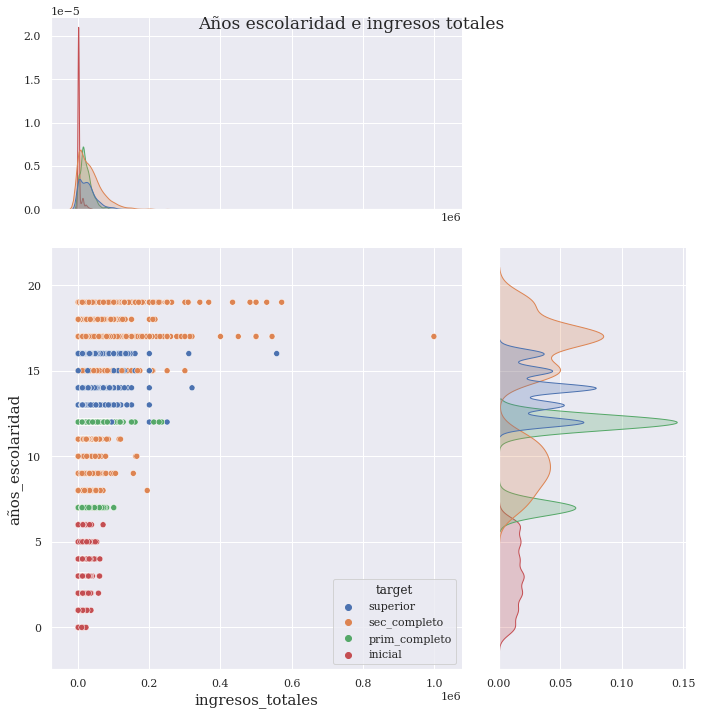

In [59]:
a=sns.jointplot(data=df, x="ingresos_totales", y="años_escolaridad", hue='target',   height=10, ratio=2, marginal_ticks=True)
a.fig.suptitle("Años escolaridad e ingresos totales", fontsize=17)

Conclusiones de la visualización:
* Hasta los 6 años, como era esperable, todos los casos llegan al nivel inicial
* Vemos dos años en que aparece el primario completo: 7 y 12 años. Estimamos que se debe a la división entre los que comenzaro su educación en la primaria y los que comenzaron en el nivel inicial.
* A partir de los 12 años vemos un aumento consistente de los ingresos totales

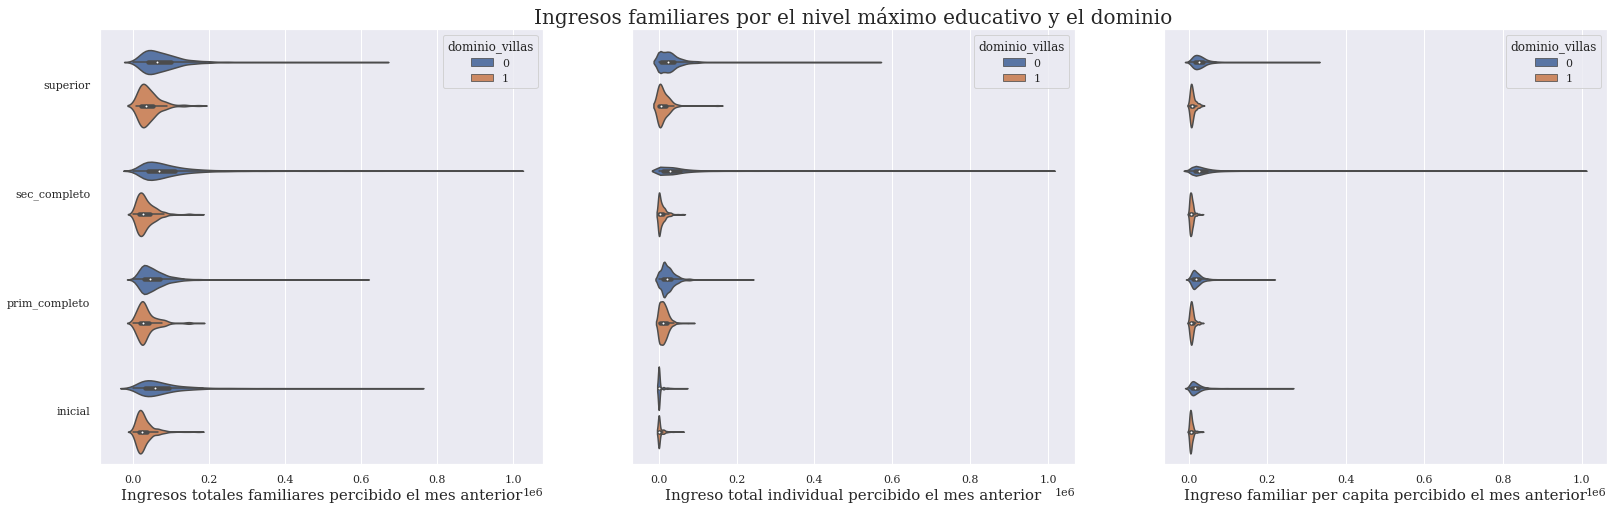

In [30]:
fig, ax = plt.subplots(figsize=(27,8),ncols=3,sharey=True)
for n,i in enumerate(['ingresos_familiares','ingresos_totales','ing_per_cap_familiar']):
  sns.violinplot(data=df,x=i,hue='dominio_villas',y='target',ax=ax[n])
  ax[n].set_ylabel("")
  ax[n].set_xlabel(etiquetas[i])
ax[1].set_title("Ingresos familiares por el nivel máximo educativo y el dominio",size=20);

Aquí obtuvimos un descubrimiento interesante: no importa el nivel máximo educativo, los casos que no provienen de villas de emergencia (dominio_villas=0) obtienen en promedio ingresos más altos en todos los niveles educativos. El alcanzar estudios superiores no parece homogeneizar ambos conjuntos.

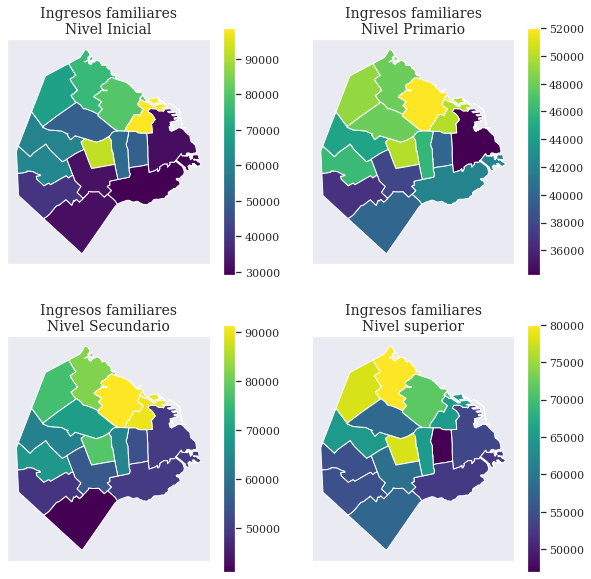

In [31]:
# Unimos ambos datasets
df2 = df.groupby(["comuna",'target']).agg({'ingresos_familiares':"median"}).reset_index() #Tomamos la mediana de los ingresos familiares

df2 = gpd.GeoDataFrame(pd.merge(df2,comunas[["COMUNAS","geometry"]],left_on="comuna",right_on="COMUNAS"))

#comunas.iloc[:,0:15] = comunas.iloc[:,0:15].applymap(int)

#generamos el lienzo
fig , ax = plt.subplots(figsize=(10,10),ncols=2,nrows=2,sharex=True,sharey=True)
plt.rcParams.update({"font.size":12,"axes.titlesize":25,"axes.labelsize":15, 'font.family':'serif'})

def mapa(variable,etiqueta,fila,columna):
  #mapa
  df2[df2['target']==variable].plot(column='ingresos_familiares',
                                            legend=True,cmap="viridis",legend_kwds={'label': ""},ax=ax[fila,columna])

  #Título y etiquetas de variables    
  ax[fila,columna].set_title('Ingresos familiares\n' + etiqueta,size=14)
  ax[fila,columna].get_xaxis().set_visible(False)
  ax[fila,columna].get_yaxis().set_visible(False);

mapa("superior","Nivel superior",1,1)
mapa("sec_completo","Nivel Secundario",1,0)
mapa("prim_completo","Nivel Primario",0,1)
mapa("inicial","Nivel Inicial",0,0)

Aquí podemos observar que a medida que avanza el nivel educativo máximo se atenúan levemente las diferencias de ingresos familiares entre comunas. Queda pendiente cruzar estos datos con la edad, para saber si el hecho de incluir a menores de edad está sesgando los valores para nivel inicial, primario y secundario.